<div align="center">
  <h1><b> Quantum Information </b></h1>
  <h2> Bell States </h2>
</div>

<br>
<b>Author:</b> <a target="_blank" href="https://github.com/camponogaraviera">Lucas Camponogara Viera</a>

# Table of Contents

- [The Four Maximally Entangled 2-Qubit States](#the-four-maximally-entangled-2-qubit-states)
- [Qiskit Implementation](#qiskit-implementation)
    - Bell states
    - Global measurement

# &nbsp; <img valign="middle" height="45px" src="https://img.icons8.com/python" width="45" hspace="0px" vspace="0px"> Importing modules

In [1]:
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit_aer import Aer

# The Four Maximally Entangled 2-Qubit States

The Bell states are a set of four 2-qubit maximally entangled pure states, defined as:

\begin{align}
|\phi^{Bell\pm}\rangle_{AB} &:= \frac{1}{\sqrt{2}} \bigg( |0\rangle_{A} \otimes |0\rangle_{B} \pm |1\rangle_{A} \otimes |1\rangle_{B} \bigg) \\
&:= \frac{1}{\sqrt{2}}\bigg(|00\rangle_{AB} \pm |11\rangle_{AB}  \bigg),
\end{align}

and 

\begin{align}
|\psi^{Bell \pm}\rangle_{AB} &:= \frac{1}{\sqrt{2}} \bigg( |0\rangle_{A} \otimes |1\rangle_{B} \pm |1\rangle_{A} \otimes |0\rangle_{B} \bigg) \\
&:= \frac{1}{\sqrt{2}}\bigg(|01\rangle_{AB} \pm |10\rangle_{AB}  \bigg).
\end{align}

Explicitly:

$$|\phi^+ \rangle := \frac{1}{\sqrt 2}(|00\rangle_{AB} + |11\rangle_{AB}),$$
$$|\phi^- \rangle := \frac{1}{\sqrt 2}(|00\rangle_{AB} - |11\rangle_{AB}),$$
$$|\psi^+ \rangle := \frac{1}{\sqrt 2}(|01\rangle_{AB} + |10\rangle_{AB}),$$
$$|\psi^- \rangle := \frac{1}{\sqrt 2}(|01\rangle_{AB} - |10\rangle_{AB}).$$

Here, $|\psi^{-}\rangle_{AB}$ is termed a **singlet state** (total spin angular momentum $S=1$), while the remaining ones are **triplet states** ($S=0$). 

The singlet state has the unique property of being **invariant under arbitrary local rotations**, i.e, global unitary operations of the form $U_A \otimes U_B |\psi^{-}\rangle_{AB} = |\psi^{-}\rangle_{AB}$, for any single qubit unitary operator $U$. This property makes the singlet state more tolerant to decoherence than the triplet state, thus being useful in quantum communication protocols, such as quantum teleportation and superdense coding, where the preservation of entanglement under local operations is crucial.


It is possible to transform one Bell state into another using **local unitary operations**, such as the Pauli matrices. These operations do not change the degree of entanglement, they always preserve it. Moreover, local unitaries are a strict subset of **stochastic local operations and classical communications (SLOCC)**, hence Bell states can also be transformed into one another by SLOCC. However, SLOCC operations in general do not preserve the degree of entanglement, they can reduce and increase it probabilistically, but cannot increase it on average.

For example, acting $\sigma_x$ (Pauli-x) on the qubit of subsystem $A$: 

$$|\phi^{+}\rangle_{AB} \xleftrightarrow{\sigma_x^A} |\psi^{+}\rangle_{AB}.$$

The following are examples of local unitary operations that transform the Bell state $|\phi^{+}\rangle_{AB}$ into the other three Bell states by acting on subsystem $A$ only:

\begin{align}
(\mathbb{I} \otimes \sigma_z) |\phi^{+}\rangle_{AB} &= |\phi^{-}\rangle_{AB},\\
(\mathbb{I} \otimes \sigma_x) |\phi^{+}\rangle_{AB} &= |\psi^{+}\rangle_{AB},\\
\end{align}

And the following operations transform triplet states into the singlet state $|\psi^{-}\rangle_{AB}$:

\begin{align}
(\mathbb{I} \otimes \sigma_z) |\psi^{+}\rangle_{AB} &= -|\psi^{-}\rangle_{AB},\\
(\mathbb{I} \otimes \sigma_x) |\phi^{-}\rangle_{AB} &= |\psi^{-}\rangle_{AB},\\
(\mathbb{I} \otimes \sigma_x \sigma_z) |\phi^{+}\rangle_{AB} &= |\psi^{-}\rangle_{AB}.
\end{align}

# Qiskit Implementation

## Bell states

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


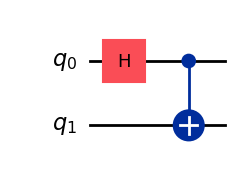

In [ ]:
# State |phi+>

def PhiPlus():
    qc = QuantumCircuit(2)                   # Creates the circuit object.
    qc.h(0), qc.cx(0,1)                      # Add gates to the circuit.
    print(Statevector.from_instruction(qc))
    return qc

phi_plus = PhiPlus()
phi_plus.draw('mpl')

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


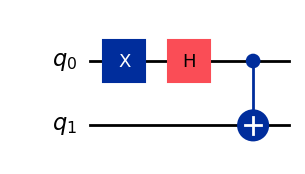

In [ ]:
# State |phi->

def PhiMinus():
    qc = QuantumCircuit(2) 
    qc.x(0), qc.h(0), qc.cx(0,1) 
    print(Statevector.from_instruction(qc))
    return qc

phi_minus = PhiMinus()
phi_minus.draw('mpl')

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


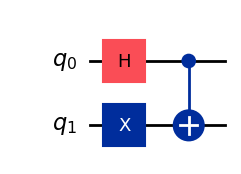

In [ ]:
# State |psi+>

def PsiPlus():
    qc = QuantumCircuit(2) 
    qc.h(0), qc.x(1), qc.cx(0,1) 
    print(Statevector.from_instruction(qc))
    return qc

psi_plus = PsiPlus()
psi_plus.draw('mpl')

Statevector([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


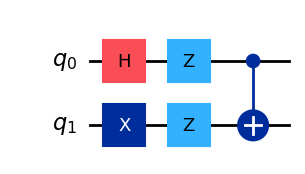

In [ ]:
# State |psi->

def PsiMinus():
    qc = QuantumCircuit(2) 
    qc.h(0), qc.x(1), qc.z(1), qc.z(0), qc.cx(0,1) 
    #qc.x([0,1]); qc.h(0); qc.cx(0,1) # prepara |Psi->
    print(Statevector.from_instruction(qc))
    return qc

psi_minus = PsiMinus()
psi_minus.draw('mpl')

## Global measurement

In [6]:
def GlobalMeasurement(qc):
    qc.measure_all() # Measuring all qubits. A quantum computer always measures in the computational basis.
    return qc 

def GetCounts(qc):
    backend = Aer.get_backend('qasm_simulator') # Define the Backend for the simulator.
    job = backend.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    print("Measurement results:", counts)                             
    return counts

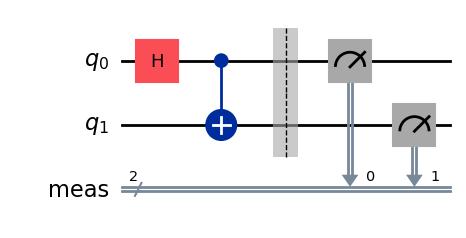

In [7]:
qc = GlobalMeasurement(phi_plus)
qc.draw('mpl')

Measurement results: {'00': 532, '11': 492}


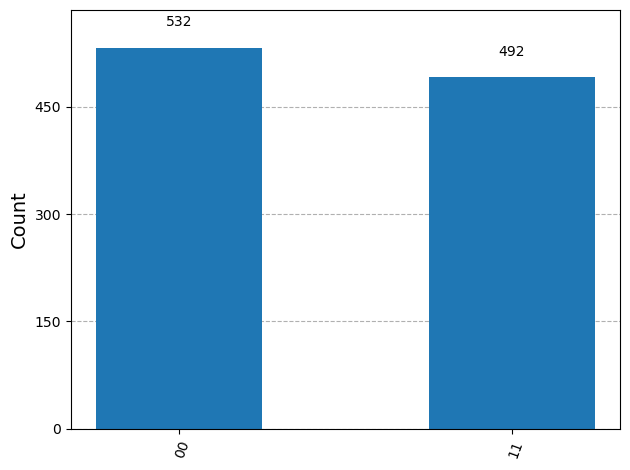

In [8]:
counts = GetCounts(qc)
plot_histogram(counts)

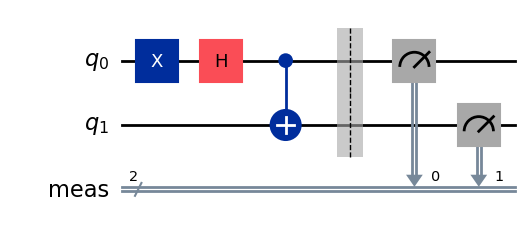

In [9]:
qc = GlobalMeasurement(phi_minus)
qc.draw('mpl')

Measurement results: {'11': 504, '00': 520}


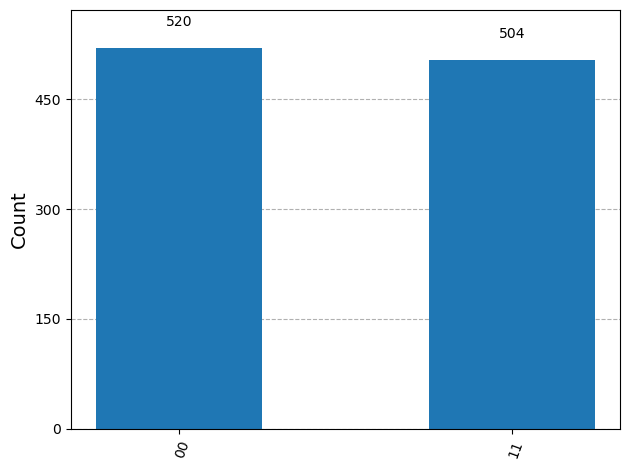

In [10]:
counts = GetCounts(qc)
plot_histogram(counts)

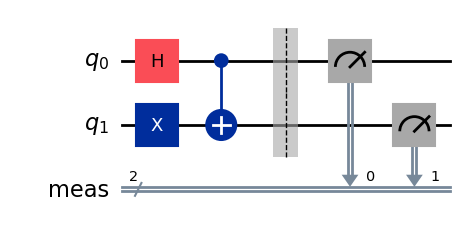

In [11]:
qc = GlobalMeasurement(psi_plus)
qc.draw('mpl')

Measurement results: {'10': 520, '01': 504}


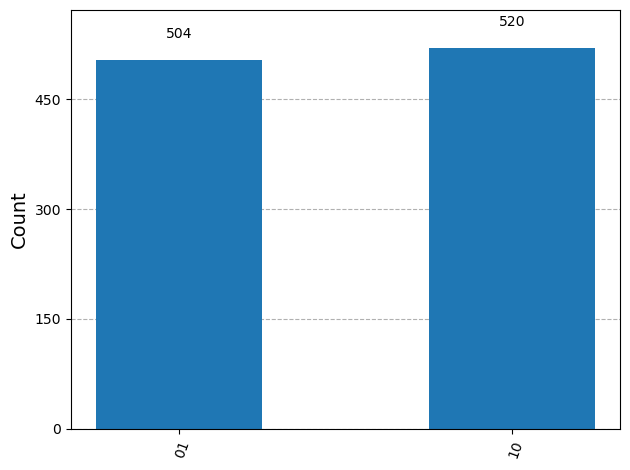

In [12]:
counts = GetCounts(qc)
plot_histogram(counts)

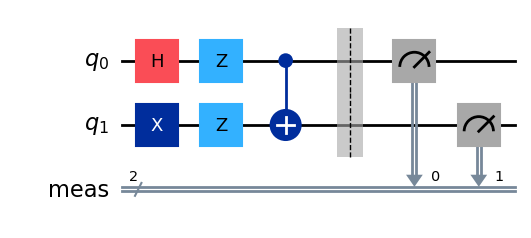

In [13]:
qc = GlobalMeasurement(psi_minus)
qc.draw('mpl')

Measurement results: {'01': 540, '10': 484}


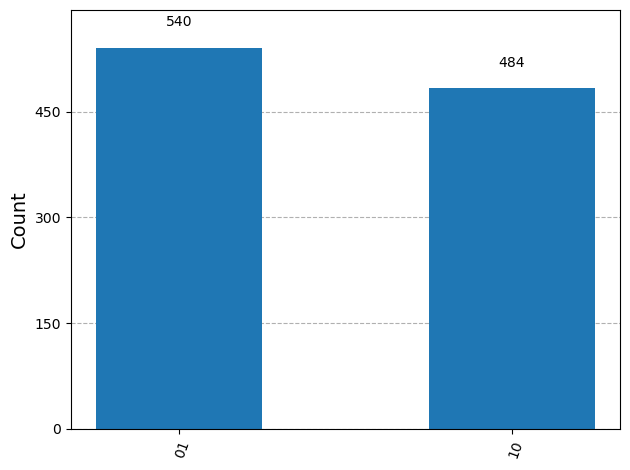

In [14]:
counts = GetCounts(qc)
plot_histogram(counts)

# &nbsp; <a href="#"><img valign="middle" height="45px" src="https://img.icons8.com/book" width="45" hspace="0px" vspace="0px"></a> References<a name="ref" />

\[1] Nielsen MA, Chuang IL. 2010. Quantum Computation and Quantum Information. New York: [Cambridge Univ. Press.](https://doi.org/10.1017/CBO9780511976667) 10th Anniv. Ed. 